In [1]:
include("src/JuliaPhonons.jl")
using JuliaPhonons
using PyPlot

### Read in data using JuliaPhonons

In [2]:
# note that the results from the iodine interstitial in MAPI at PBEsol level of theory dont make great sense
# as the negative was not relaxed from the neutral case.
# this has been fixed for HSE06 but I have not done the phonons yet...


poscar_neutral = JuliaPhonons.read_POSCAR(open("./examples/MAPI_H_centre/neutral_POSCAR"))
poscar_negative = JuliaPhonons.read_POSCAR(open("./examples/MAPI_H_centre/negative_POSCAR"))
poscar_perfect = JuliaPhonons.read_POSCAR(open("./examples/MAPI_H_centre/perfect_POSCAR"))
phonons_neutral = JuliaPhonons.read_meshyaml(open("./examples/MAPI_H_centre/neutral_mesh.yaml"),poscar_neutral)
phonons_negative = JuliaPhonons.read_meshyaml(open("./examples/MAPI_H_centre/negative_mesh.yaml"),poscar_negative)
phonons_perfect = JuliaPhonons.read_meshyaml(open("./examples/MAPI_H_centre/perfect_mesh.yaml"),poscar_perfect)


[12.5743 0.000853903 0.137524; 0.000141603 12.4741 -0.000835312; 0.138595 -1.31954e-5 12.7567]
Volume: 2000.6757668208738
SubString{String}["C", "N", "H", "Pb", "I"]
POSCAR.natoms: 97
AbstractString["C", "C", "C", "C", "C", "C", "C", "C", "N", "N", "N", "N", "N", "N", "N", "N", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "Pb", "Pb", "Pb", "Pb", "Pb", "Pb", "Pb", "Pb", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I"]
supercellexpansions ==>Array{Float64,1}[[0.0, 0.0, 0.0]]
[12.5743 0.000853903 0.137524; 0.000141603 12.4741 -0.000835312; 0.138595 -1.31954e-5 12.7567]
Volume: 2000.6757668208738
SubString{String}["C", "N", "H", "Pb", "I"]
POSCAR.natoms: 97
AbstractString["C", "C", "C", "C", "C", "C", "C", "C", "N", "N", "N

(Any[[0.0909134 0.104155 0.00862495; 0.0983182 0.112363 0.0100874; … ; 0.296444 0.337899 0.0287834; 0.301282 0.337792 0.0266648], [0.103906 -0.0888006 -0.0298532; 0.112019 -0.0958573 -0.0318454; … ; 0.33584 -0.288231 -0.0965737; 0.333316 -0.287944 -0.101759], [0.0177765 -0.0265022 0.134911; 0.0189084 -0.02859 0.146352; … ; 0.0576788 -0.0859989 0.440055; 0.0569092 -0.0859566 0.44134], [0.00139734 -0.096189 8.25423e-5; 0.00135372 -0.153166 0.000269111; … ; 0.0016166 -0.0904076 0.0011816; -0.0013526 0.851741 -0.00128379], [0.101602 0.00156059 0.0633646; 0.090599 0.000544892 0.116293; … ; 0.296459 0.00428477 0.4966; -0.16475 -0.00294152 -0.569291], [0.0164859 -0.00238063 0.0358293; 0.0125822 -0.00192689 0.0524691; … ; 0.72516 0.00516873 -0.0579192; -0.081074 -0.00290181 0.464587], [0.00133076 -0.202322 -0.00373144; 0.0010399 -0.202927 -0.00348954; … ; -0.0113752 0.253608 -0.00858101; -0.0004269 -0.249335 -0.000658783], [0.0905063 0.0040615 -0.0868587; 0.117656 0.00373707 -0.139297; … ; -0.

### Project displacement (negative -> neutral) onto negative phonon modes

This tells us which modes are active for the charge transition

In [3]:
displacement =  poscar_neutral.positions.-poscar_negative.positions 

# check to see if any that shifted more than half a unit cell - in this case it is more likely 
# that moved into a neighbouring cell.
# I have been careful to define this so that if the start and end points are interchanged the displacement stays the same.
for i = 1:size(displacement,2)
    for j = 1:size(displacement,1)
        if (displacement[j,i]) > 0.5
            displacement[j,i] = 1-(displacement[j,i])
            
        end
        if (displacement[j,i]) < -0.5
            displacement[j,i] = -1-(displacement[j,i])
            
        end
    end
end


In [4]:
# scalar projection https://en.wikipedia.org/wiki/Dot_product
# abs or no?
projections = []
for eigenvector in phonons_negative[1]   # projecting onto negative as these are stable imaginary in neutral phonon :(
    push!(projections,abs(dot(displacement,eigenvector)))
end

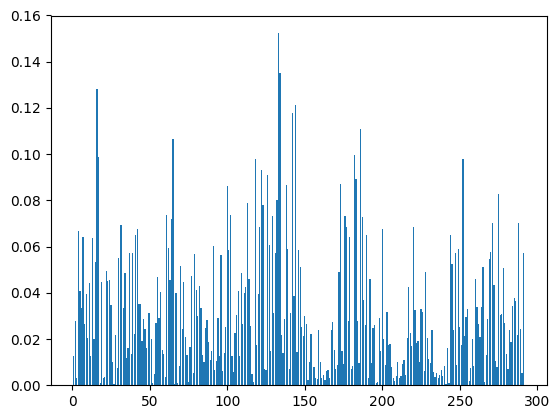

(PyObject <matplotlib.patches.Rectangle object at 0x12bb89b38>, PyObject <matplotlib.patches.Rectangle object at 0x12bb89940>, PyObject <matplotlib.patches.Rectangle object at 0x12bb9a198>, PyObject <matplotlib.patches.Rectangle object at 0x12bb9a4e0>, PyObject <matplotlib.patches.Rectangle object at 0x12bb9a828>, PyObject <matplotlib.patches.Rectangle object at 0x12bb9aba8>, PyObject <matplotlib.patches.Rectangle object at 0x12bb9af28>, PyObject <matplotlib.patches.Rectangle object at 0x12bba72e8>, PyObject <matplotlib.patches.Rectangle object at 0x12bba7668>, PyObject <matplotlib.patches.Rectangle object at 0x12bba79e8>, PyObject <matplotlib.patches.Rectangle object at 0x12bba7d68>, PyObject <matplotlib.patches.Rectangle object at 0x12bbb0128>, PyObject <matplotlib.patches.Rectangle object at 0x12bbb04a8>, PyObject <matplotlib.patches.Rectangle object at 0x12bbb0828>, PyObject <matplotlib.patches.Rectangle object at 0x12bbb0ba8>, PyObject <matplotlib.patches.Rectangle object at 0x12b

In [5]:
PyPlot.bar(1:3*poscar_negative.natoms,projections)

In [6]:
# Not sure if this should be abs or not. Gives the phonon modes which contribute to the distortion.
# Perhaps  abs: num modes = num_atoms * 3 (for each dimension) 
# could be used to analyse (with three-phonon phase space) how efficiently heat will propagate away
for (i,item) in enumerate(projections)
 if abs(item) > 0.1
        println(i)
    end
    end

16
65
133
134
142
144
186


### Use IPR analysis to investigate these modes more closely

- are these modes localised (high amplitude?)
- which elements contribute to each mode
- We would expect iodine to be very active. Do the modes with a large contriubtion from iodine correspond to the modes which are active in the displacement? (the assumption here is that the defect atom and surrounding iodine are the ones which will distort the most)

In [7]:
# see "MAPI_iodine_defect_phonons.ipynb" and "MAPI_iodine_defect_stacked_barchart" for more analysis (in Python...)
# but this should be built into Julia workflow
mode_num = 16
mode_data = JuliaPhonons.decompose_eigenmode_atom_contributions(poscar_negative,phonons_negative[2][mode_num],phonons_negative[1][mode_num])

Normalising sum (Energy): 6.030733413925918 Normalising sum (Displacement): 1.4106454452426767
Mode: 0.672960516 Atom: 1 C	 EnergyFraction: 0.01815230965031829	 DisplacementFraction: 0.022393018958702077	 PR-E: 0.011984061934842681
Mode: 0.672960516 Atom: 2 C	 EnergyFraction: 0.013321838445659874	 DisplacementFraction: 0.016434061925182996	 PR-E: 0.0064545889103237615
Mode: 0.672960516 Atom: 3 C	 EnergyFraction: 0.017971238403993967	 DisplacementFraction: 0.02216964617970448	 PR-E: 0.011746169761932742
Mode: 0.672960516 Atom: 4 C	 EnergyFraction: 0.013421016105359174	 DisplacementFraction: 0.01655640928795439	 PR-E: 0.006551052158230249
Mode: 0.672960516 Atom: 5 C	 EnergyFraction: 0.0030177782138580598	 DisplacementFraction: 0.0037227860287683385	 PR-E: 0.00033121873946994365
Mode: 0.672960516 Atom: 6 C	 EnergyFraction: 0.0036983327571908815	 DisplacementFraction: 0.004562330477097838	 PR-E: 0.0004974532018713065
Mode: 0.672960516 Atom: 7 C	 EnergyFraction: 0.0034954065103059793	 Displ

Mode: 0.672960516 Atom: 73 I	 EnergyFraction: 0.03924130285195717	 DisplacementFraction: 0.014892405984425055	 PR-E: 0.05600503824274096
Mode: 0.672960516 Atom: 74 I	 EnergyFraction: 0.009642973419691848	 DisplacementFraction: 0.0036595898868303804	 PR-E: 0.0033819112116216642
Mode: 0.672960516 Atom: 75 I	 EnergyFraction: 0.02014364760841991	 DisplacementFraction: 0.007644684462274936	 PR-E: 0.014757625758828432
Mode: 0.672960516 Atom: 76 I	 EnergyFraction: 0.028010715692278462	 DisplacementFraction: 0.010630303269426522	 PR-E: 0.028535709367974164
Mode: 0.672960516 Atom: 77 I	 EnergyFraction: 0.0051148947713400145	 DisplacementFraction: 0.0019411457817744015	 PR-E: 0.0009515106837315221
Mode: 0.672960516 Atom: 78 I	 EnergyFraction: 0.003098437231694291	 DisplacementFraction: 0.0011758831083088785	 PR-E: 0.00034916095076287397
Mode: 0.672960516 Atom: 79 I	 EnergyFraction: 0.0020765057362595197	 DisplacementFraction: 0.0007880514714312517	 PR-E: 0.00015682183543475666
Mode: 0.672960516 

### Calculate the distribution function for neutral and negative phonon modes

A delta function means that the modes are unaffected by the change in charge state.
- Idea: fit a gaussian to give a width, and use this as a measure? 


In [9]:
# idea for the distribution function from https://aip.scitation.org/doi/pdf/10.1063/1.4984833?class=pdf
# it projects a mode onto the basis set of another charge state or the perfect cell.
# if it is broad across perfect cell modes --> it is a localised state, as it cannot be well described by the delocalised modes of perfect cell

distribution_function = []
for neut_mode in phonons_neutral[1]
    for neg_mode in phonons_negative[1]
    push!(distribution_function,(dot(neut_mode,neg_mode)^2))
    end
end

distribution_function = reshape(distribution_function,3*poscar_negative.natoms,3*poscar_neutral.natoms)

291×291 Array{Any,2}:
 2.67578e-7   0.364643     6.49538e-5   …  7.14937e-11  1.65079e-12
 9.24254e-9   0.46886      0.267407        8.72513e-11  3.14329e-10
 3.61811e-8   0.166485     0.732525        6.77958e-12  5.52118e-11
 0.0292077    6.69461e-7   1.50492e-9      4.05006e-7   0.00016245 
 0.0109813    8.41929e-7   8.08201e-7      4.36769e-5   2.4063e-7  
 0.00219297   2.42571e-7   8.77881e-7   …  8.37067e-6   1.8654e-5  
 0.00884892   6.65466e-7   6.48152e-9      1.41476e-5   2.29365e-5 
 0.00506396   3.6485e-8    5.70195e-11     2.86278e-5   6.83268e-5 
 0.010684     7.33569e-9   8.17341e-9      2.84863e-5   1.5066e-7  
 0.000399789  2.45739e-10  4.78504e-8      8.68955e-6   3.40406e-7 
 5.99814e-5   1.18147e-8   1.07367e-7   …  4.62962e-6   4.18371e-6 
 9.1087e-5    4.04304e-7   5.29486e-8      1.37814e-5   3.77568e-6 
 9.23825e-7   3.50915e-11  1.37067e-8      2.9603e-6    2.09921e-5 
 ⋮                                      ⋱               ⋮          
 5.40418e-8   9.68842e-12 

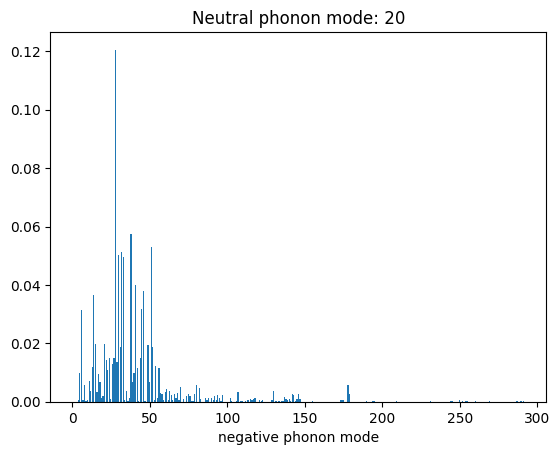

28

In [14]:
## this tells us which modes have shifted up or down in energy

i=20

PyPlot.bar(1:3*poscar_negative.natoms,distribution_function[:,i])
PyPlot.xlabel("negative phonon mode")
PyPlot.title(string("Neutral phonon mode: ",i))

indmax(distribution_function[:,i])

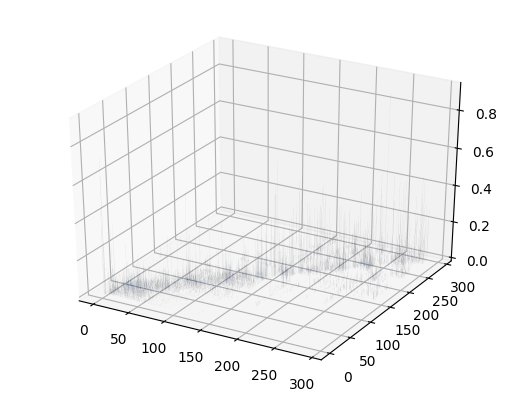

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x246135518>

In [146]:
# Plot in 3D
# not much documentation, this prob most useful: https://matplotlib.org/gallery/mplot3d/3d_bars.html
# Note that arrays should not be Any type as Python does not like

A=zeros(3*poscar_neutral.natoms,3*poscar_neutral.natoms)
B=zeros(3*poscar_neutral.natoms,3*poscar_neutral.natoms)
for i in 1:3*poscar_neutral.natoms
A[i,:] = i
B[:,i] = i
end

y=collect(Iterators.flatten(A))
x=collect(Iterators.flatten(B))
bottom=fill(0,3*poscar_neutral.natoms*3*poscar_neutral.natoms)
width=0.01
depth=0.01
top=convert(Array{Float64,1}, collect(Iterators.flatten(distribution_function)))


PyPlot.bar3D(x,y,bottom,width,depth,top)

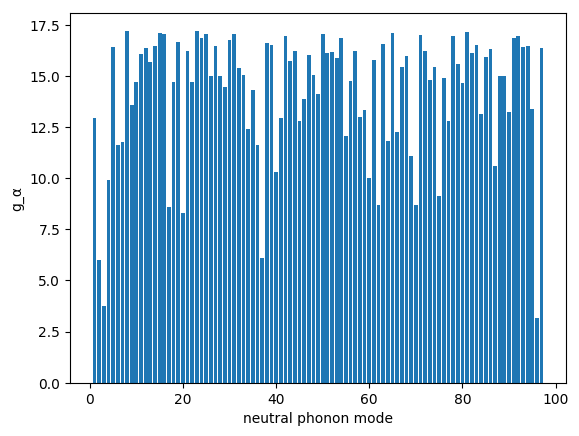

PyObject Text(24,0.5,'g_α')

In [11]:
# the cutoff here seems a little bit arbitrary; am I inerpreting the appraoch in Gao et al correctly? - Hmmm, no!


g = []
for i in 1:poscar_neutral.natoms
    # lots going on here. First filter so anything less than 0.05, the cutoff, is not included. Then find the minimum and take reciprocal.
    push!(g,maximum(1 ./ minimum(distribution_function[:,i][distribution_function[:,i] .> 0.058])))
    end
PyPlot.bar(collect(1:poscar_neutral.natoms),convert(Array{Float64,1},g))
PyPlot.xlabel("neutral phonon mode")
PyPlot.ylabel("g_α")


### Calculate the distribution function for negative and perfect phonon modes

- I think this is more meaningful than the above distribution function
- the localised modes are the ones with a small g-value (broad distribution), as they are not well described by the delocalised modes
- the challenge is describing the perfect and defect system with the same basis set



In [243]:
## build the expanded perfect basis set so that it has the same size as the defect supercell basis set.
## can have either interstitials or vacancies, not both

# TODO: vacancies
# TODO: annotate

num_unit_cells = 8
defect_atom_index = [3]
# need to do this programatically
defect_eigenvector_index = []
for index in defect_atom_index
     start=(index-1)*num_unit_cells*3
     push!(defect_eigenvector_index,start)
     push!(defect_eigenvector_index,start+1)
     push!(defect_eigenvector_index,start+2)
end
defect_type = "interstitial"

if defect_type == "interstitial"
    num_atoms_expanded = (poscar_perfect.natoms*num_unit_cells)+length(defect_index)
elseif defect_type == "vacancy"
    num_atoms_expanded = (poscar_perfect.natoms*num_unit_cells)-length(defect_index)
end

expanded_basis_set = Array{Any,1}(3*num_atoms_expanded) # initialise expanded basis set
defect_eigenvectors_remaining = length(defect_index)*3
for eigenvector_index in reverse(1:length(expanded_basis_set))
    expanded_eigenvector = Array{Float64,2}(num_atoms_expanded,3)    
    defect_atoms_remaining = length(defect_index)
    for atom_index in reverse(1:(num_atoms_expanded))
        if atom_index in defect_atom_index && defect_type=="interstitial"
            expanded_eigenvector[atom_index,:]=[0,0,0]
            defect_atoms_remaining -= 1       
#        elseif atom_num not in defect_index && defect_type=="vacancy".....
        else
            expanded_eigenvector[atom_index,:]=phonons_perfect[1][Int(ceil((eigenvector_index-(defect_eigenvectors_remaining))/num_unit_cells))][Int(ceil((atom_index-defect_atoms_remaining)/num_unit_cells)),:] 
        end
    end 
    
    if eigenvector_index in defect_eigenvector_index# && defect_type=="interstitial"
        expanded_basis_set[eigenvector_index] = zeros(num_atoms_expanded,3)  
        defect_eigenvectors_remaining -= 1
#        elseif atom_num not in defect_index && defect_type=="vacancy".....
    else
        expanded_basis_set[eigenvector_index] = expanded_eigenvector
    end
end

In [244]:
expanded_basis_set[49]

97×3 Array{Float64,2}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 ⋮            
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

### very simple comparison; what is the shift in phonon frequency ?

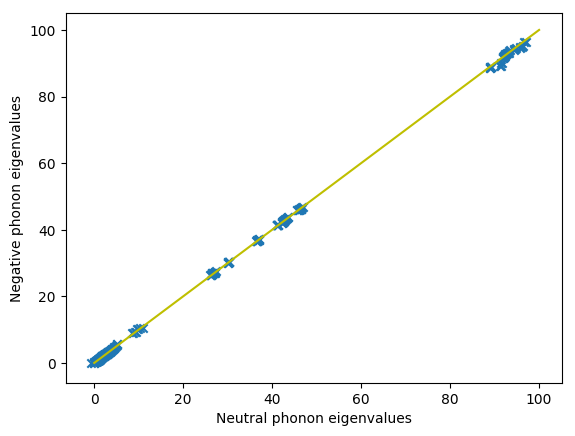

PyObject Text(24,0.5,'Negative phonon eigenvalues')

In [215]:
## simple comparison - how the eigenvalues have been perturbed by change in charge state

PyPlot.plot([0,100],[0,100],color="y")
PyPlot.scatter(phonons_neutral[2],phonons_negative[2],marker="x")
PyPlot.xlabel("Neutral phonon eigenvalues")
PyPlot.ylabel("Negative phonon eigenvalues")